## MonteCarlo

$\textbf{Libreria simplementación}$

In [1]:
import numpy as np
import scipy.integrate as integrate
import scipy.stats as st
import matplotlib.pyplot as plt

$\textbf{Funciones}$

In [2]:
def mesesAños(mes):
    valor = mes/12
    return valor

In [3]:
def MonteCarloBS(S,K,r,T,t,sigma,m):
    mu = 0
    sigma1 = 1
    
    m1 = (r - 0.5*(sigma**2))*(T-t)
    m2 = sigma*np.sqrt((T-t))
    disc = (np.exp(-r*(T-t)))
    s1 = 0
    s2 = 0
    
    for i in range(1,m):
        Z = np.random.normal(mu,sigma1)
        xa = S*np.exp(m1 + m2*Z)
        xb = S*np.exp(m1 - m2*Z)
        payoffa = max(xa - K,0)
        payoffb = max(xb - K,0)
        payoff = (payoffa + payoffb)/2
        s1 = s1 + payoff
        s2 = s2 + payoff**2
    
    std = disc*np.sqrt( (s2 - ((s1**2)/(m)))/m/(m-1)   )
    call = disc*s1/m
    return call, std

In [4]:
def ConstrucionUNOBS(S,E,r,T,t,sigma,m1):
    VResultados = []
    Error = []
    for i in range(2,m1):
        valor , error = MonteCarloBS(S,E,r,T,t,sigma,m1)
        VResultados.append(valor)
        Error.append(error)
    return VResultados, Error

def ConstrucionDOSBS(VResultados,Error):
    MediaValor = np.mean(VResultados)
    MediaError = np.mean(Error)
    ErrorN = MediaValor - 1.96*MediaError
    ErrorP = MediaValor + 1.96*MediaError
    return ErrorN, ErrorP

def ConstrucionTRESBS(ValorTeorico,VResultados,ErrorN,ErrorP,m1):
    ultimo = VResultados[m1-3]
    plt.title("Monte carlo Black - Scholes")
    plt.plot(VResultados, color = "#000000", label = "Resultado Computacional")
    plt.axhline(ErrorP, color= "#7822C3", ls="dashed", label = "Intervalo de confianza")
    plt.axhline(ErrorN, color= "#7822C3", ls="dashed")
    plt.axhline(ValorTeorico, color= "#FF0000", ls="dashdot", label = "Resultado Teórico")
    plt.scatter(m1,ultimo,label = "Ultimo Valor = {}".format(ultimo), color = "#2DC346")
    plt.legend()
    plt.show()

In [19]:
def ConstrucionVariosDiagrama(ValorTeorico,VResultados,ErrorN,ErrorP,m1):
    valor1 = int(m1/2)
    valor2 = int(m1/4)
    valor3 = int(m1/8)

    ultimo3 = VResultados[valor3-3]
    ultimo2 = VResultados[valor2-3]
    ultimo1 = VResultados[valor1-3]
    ultimo = VResultados[m1-3]
    
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 8))
    
    axes[0, 0].set_title("Monte carlo Black - Scholes con {} iteraciones".format(valor3))
    axes[0, 0].plot(VResultados[2:valor3], color = "#000000", label = "Resultado Computacional")
    axes[0, 0].axhline(ErrorP, color= "#7822C3", ls="dashed", label = "Intervalo de confianza")
    axes[0, 0].axhline(ErrorN, color= "#7822C3", ls="dashed")
    axes[0, 0].axhline(ValorTeorico, color= "#FF0000", ls="dashdot", label = "Resultado Teórico")
    axes[0, 0].scatter(valor3,ultimo3,label = "Ultimo Valor = {}".format(ultimo3), color = "#2DC346")
    axes[0, 0].legend()
    
    axes[0, 1].set_title("Monte carlo Black - Scholes con {} iteraciones".format(valor2))
    axes[0, 1].plot(VResultados[2:valor2], color = "#000000", label = "Resultado Computacional")
    axes[0, 1].axhline(ErrorP, color= "#7822C3", ls="dashed", label = "Intervalo de confianza")
    axes[0, 1].axhline(ErrorN, color= "#7822C3", ls="dashed")
    axes[0, 1].axhline(ValorTeorico, color= "#FF0000", ls="dashdot", label = "Resultado Teórico")
    axes[0, 1].scatter(valor2,ultimo2,label = "Ultimo Valor = {}".format(ultimo2), color = "#2DC346")
    axes[0, 1].legend()
    
    axes[1, 0].set_title("Monte carlo Black - Scholes con {} iteraciones".format(valor1))
    axes[1, 0].plot(VResultados[2:valor1], color = "#000000", label = "Resultado Computacional")
    axes[1, 0].axhline(ErrorP, color= "#7822C3", ls="dashed", label = "Intervalo de confianza")
    axes[1, 0].axhline(ErrorN, color= "#7822C3", ls="dashed")
    axes[1, 0].axhline(ValorTeorico, color= "#FF0000", ls="dashdot", label = "Resultado Teórico")
    axes[1, 0].scatter(valor1,ultimo1,label = "Ultimo Valor = {}".format(ultimo1), color = "#2DC346")
    axes[1, 0].legend()
    
    axes[1, 1].set_title("Monte carlo Black - Scholes con {} iteraciones".format(m))
    axes[1, 1].plot(VResultados, color = "#000000", label = "Resultado Computacional")
    axes[1, 1].axhline(ErrorP, color= "#7822C3", ls="dashed", label = "Intervalo de confianza")
    axes[1, 1].axhline(ErrorN, color= "#7822C3", ls="dashed")
    axes[1, 1].axhline(ValorTeorico, color= "#FF0000", ls="dashdot", label = "Resultado Teórico")
    axes[1, 1].scatter(m1,ultimo,label = "Ultimo Valor = {}".format(ultimo), color = "#2DC346")
    axes[1, 1].legend()

__________________________________________________________________________________________________________

## Ejemplos

__________________________

In [24]:
#Valores
S = 1.3533 # Precio actual
K = 1.3533 # Strike
T = 1 # Venimiento en años
t = 0
r = 0.072/100 # Tasa libre de riego
sigma = 0.77/100 # Volatilidad

m=1000 # Iteraciones

valor, error = MonteCarloBS(S,K,r,T,t,sigma,m)
print(" valor = {} \n error = {} \n Intervalo de confianza 95% = ({},{})".format(valor,error,valor - 1.96*error,valor + 1.96*error))

 valor = 0.004902493781523103 
 error = 9.999883183300006e-05 
 Intervalo de confianza 95% = (0.004706496071130423,0.005098491491915783)


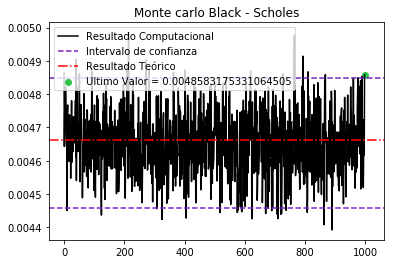

In [25]:
ValorTeorico = 0.004660802494430016
VResultados, Error= ConstrucionUNOBS(S,K,r,T,t,sigma,m)
ErrorN , ErrorP = ConstrucionDOSBS(VResultados,Error)

ConstrucionTRESBS(ValorTeorico,VResultados,ErrorN,ErrorP,m)

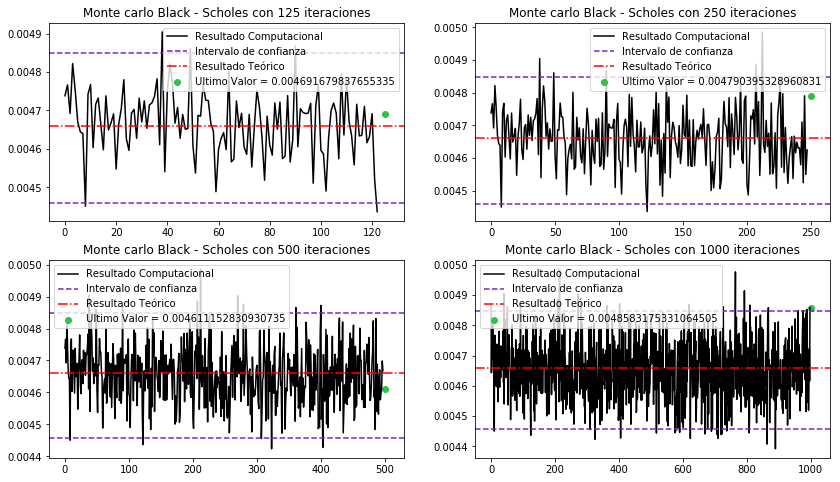

In [26]:
ConstrucionVariosDiagrama(ValorTeorico,VResultados,ErrorN,ErrorP,m)

_____________________________________________________________________________

In [27]:
#Valores
S = 19.08 # Precio actual
K = 19.5 # Strike
T = mesesAños(1.5) # Venimiento en años
t = 0
r = 0.07 # Tasa libre de riego
sigma = 0.1725 # Volatilidad

m=1000 # Iteraciones

valor, error = MonteCarloBS(S,K,r,T,t,sigma,m)
print(" valor = {} \n error = {} \n Intervalo de confianza 95% = ({},{})".format(valor,error,valor - 1.96*error,valor + 1.96*error))

 valor = 0.34895417448760235 
 error = 0.011540851367899996 
 Intervalo de confianza 95% = (0.32633410580651834,0.37157424316868637)


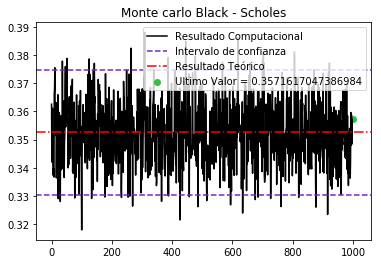

In [28]:
ValorTeorico = 0.35274894204899976
VResultados, Error= ConstrucionUNOBS(S,K,r,T,t,sigma,m)
ErrorN , ErrorP = ConstrucionDOSBS(VResultados,Error)

ConstrucionTRESBS(ValorTeorico,VResultados,ErrorN,ErrorP,m)

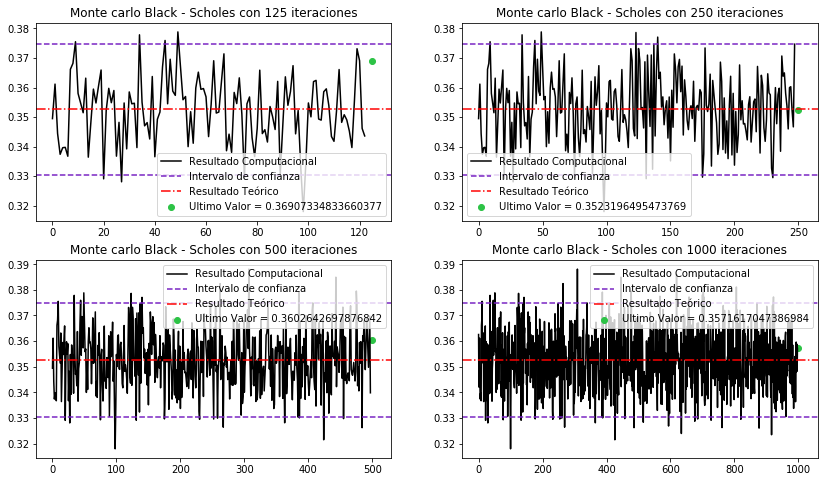

In [29]:
ConstrucionVariosDiagrama(ValorTeorico,VResultados,ErrorN,ErrorP,m)

_____________________________________________________________________________

In [30]:
#Valores
S = 50 # Precio actual
K = 40 # Strike
T = 0.25 # Venimiento en años
t = 0
r = 0.1 # Tasa libre de riego
sigma = 0.3 # Volatilidad

m=1000 # Iteraciones

valor, error = MonteCarloBS(S,K,r,T,t,sigma,m)
print(" valor = {} \n error = {} \n Intervalo de confianza 95% = ({},{})".format(valor,error,valor - 1.96*error,valor + 1.96*error))

 valor = 11.062936492957503 
 error = 0.037235518108471324 
 Intervalo de confianza 95% = (10.9899548774649,11.135918108450106)


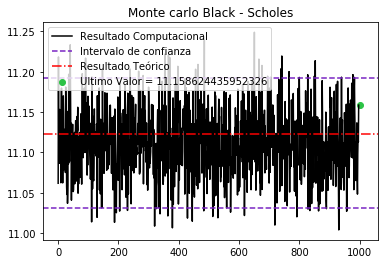

In [31]:
ValorTeorico = 11.12263796505259
VResultados, Error= ConstrucionUNOBS(S,K,r,T,t,sigma,m)
ErrorN , ErrorP = ConstrucionDOSBS(VResultados,Error)

ConstrucionTRESBS(ValorTeorico,VResultados,ErrorN,ErrorP,m)

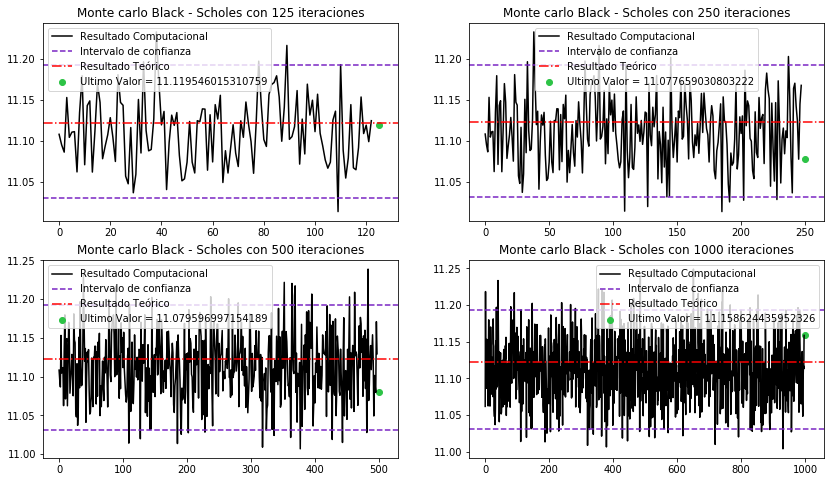

In [32]:
ConstrucionVariosDiagrama(ValorTeorico,VResultados,ErrorN,ErrorP,m)